<a href="https://colab.research.google.com/github/fatemakotha/Data-Science/blob/main/87_90_Plotting_from_Pandas_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#**PLOTTING FROM A SERIES:**




In [3]:
car_sales = pd.read_csv("car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [4]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range("1/1/2023", periods=1000))
ts

2023-01-01   -0.623363
2023-01-02    0.433752
2023-01-03    2.351002
2023-01-04   -0.529605
2023-01-05   -0.309925
                ...   
2025-09-22    0.137304
2025-09-23    0.110444
2025-09-24    0.173542
2025-09-25    2.758968
2025-09-26   -0.453770
Freq: D, Length: 1000, dtype: float64

##.cumsum is cumulative sum




In [5]:
ts.cumsum()

2023-01-01    -0.623363
2023-01-02    -0.189610
2023-01-03     2.161391
2023-01-04     1.631787
2023-01-05     1.321862
                ...    
2025-09-22    24.126394
2025-09-23    24.236838
2025-09-24    24.410381
2025-09-25    27.169348
2025-09-26    26.715578
Freq: D, Length: 1000, dtype: float64

#**PLOTTING FROM A DATAFRAME:**

In [6]:
car_sales.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"


###**Replace the dollar sign, comma and dot:**

In [7]:
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "") #replace $,. with empty string"
car_sales.head(2)

<ipython-input-7-b03793661783>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]", "") #replace $,. with empty string"


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000


###**Remove the last two zeros in prices:**

In [8]:
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales.head(2)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000


###**.date_range to add a column of date:**



In [9]:
# The number of periods: we need 1 for each data point in our car sales df. Thus, periods = len(car_sales)
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


##**.cumsum to add a column of added prices:**

In [10]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()

In [11]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,40005000
2,Toyota,Blue,32549,3,7000,2020-01-03,400050007000
3,BMW,Black,11179,5,22000,2020-01-04,40005000700022000
4,Nissan,White,213095,4,3500,2020-01-05,400050007000220003500
5,Toyota,Green,99213,4,4500,2020-01-06,4000500070002200035004500
6,Honda,Blue,45698,4,7500,2020-01-07,40005000700022000350045007500
7,Honda,Blue,54738,4,7000,2020-01-08,400050007000220003500450075007000
8,Toyota,White,60000,4,6250,2020-01-09,4000500070002200035004500750070006250
9,Nissan,White,31600,4,9700,2020-01-10,40005000700022000350045007500700062509700


In [12]:
type(car_sales["Price"])

pandas.core.series.Series

In [13]:
type(car_sales["Price"][0])

str

##**Change the price to an int**

In [14]:
car_sales["Price"] = car_sales["Price"].str.replace("[$\,\.]", "").astype(int)

<ipython-input-14-bc278b62b3c3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  car_sales["Price"] = car_sales["Price"].str.replace("[$\,\.]", "").astype(int)


In [15]:
type(car_sales["Price"][0])

numpy.int64

##**And then apply .cumsum()**

In [16]:
car_sales["Total Sales"] = car_sales["Price"].cumsum()


In [17]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


#**OR if you want to use a single line, use the code below:**


```
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum() 
```



##**Let's plot the Total Sales:**

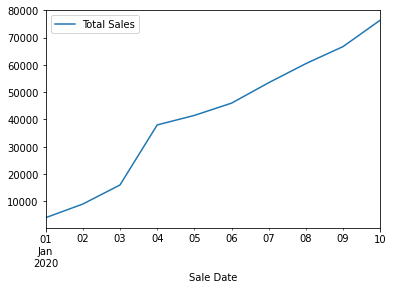

In [18]:
car_sales.plot(x="Sale Date", y="Total Sales")

#**Method 1**

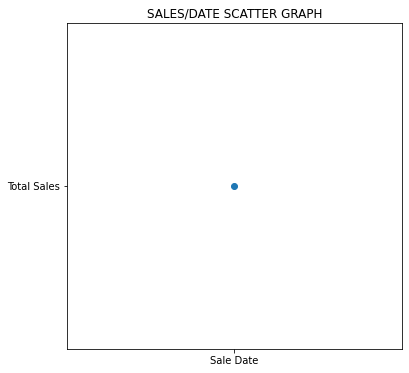

In [19]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x="Sale Date", y="Total Sales") #(x, y)
ax.set(title="SALES/DATE SCATTER GRAPH", ylabel="", xlabel="", );

#**Method 2**

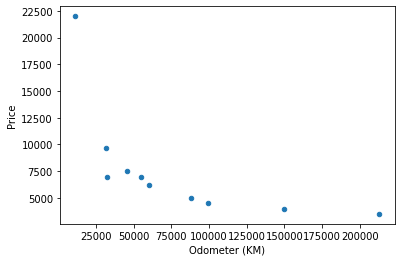

In [20]:
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

#**HOW ABOUT A BAR GRAPH?**

In [25]:
x = np.random.rand(10, 4)
x.head()

AttributeError: ignored

In [24]:
df = pd.DataFrame(x, columns=["a", "b", "c", "d"])
df.head()

,a,b,c,d
0,0.125050,0.798957,0.891627,0.337492
1,0.777922,0.045588,0.817809,0.068757
2,0.849783,0.511495,0.988564,0.923471
3,0.251832,0.988585,0.518671,0.596789
4,0.636035,0.552115,0.072541,0.368205


#**METHOD 1:**

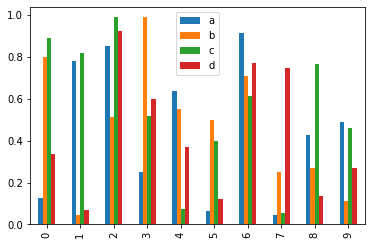

In [26]:
df.plot.bar()

#METHOD 2

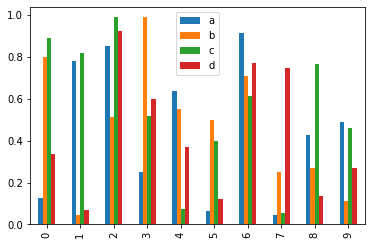

In [27]:
df.plot(kind="bar");

#**BAR GRAPH for car_sales**

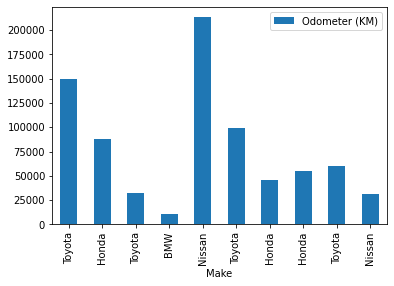

In [29]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

#**HISTOGRAM for car_sales**

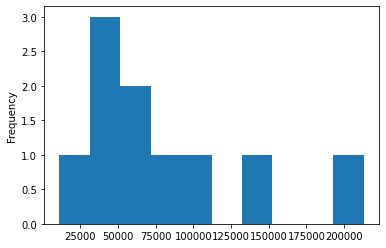

In [30]:
car_sales["Odometer (KM)"].plot.hist();

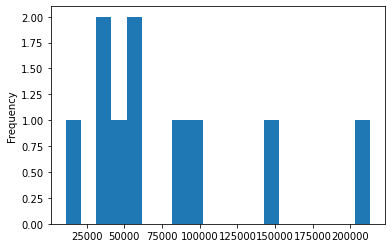

In [34]:
car_sales["Odometer (KM)"].plot.hist(bins=20); #change bins to change spacing

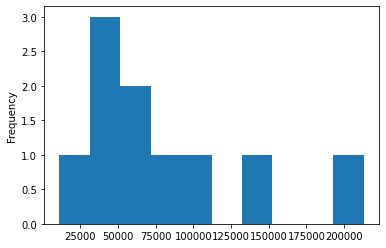

In [32]:
car_sales["Odometer (KM)"].plot(kind="hist");